# Plotting brain region values on the Swanson flat map

The Swanson flatmap is a 2D representation of the mouse brain to facilitate comparative analysis of brain data.
We extended the mouse atlas presented by [Hahn et al.](https://onlinelibrary.wiley.com/doi/full/10.1002/cne.24966?casa_token=kRb4fuUae6wAAAAA%3AHoiNx1MNVgZNUXT-MZN_mU6LAjKBiz5OE5cFj2Aj-GUE9l-oBllFUaM11XwCtEbpJyxKrwaMRnXC7MjY)
to interface programmatically with the Allen Atlas regions.

/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:439: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:441: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))


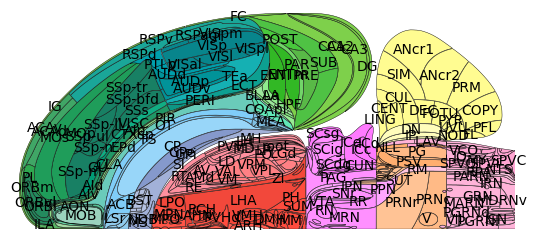

In [10]:
import numpy as np
from ibllib.atlas.flatmaps import plot_swanson_vector
from ibllib.atlas import BrainRegions

br = BrainRegions()

# Plot Swanson map will default colors and acronyms
plot_swanson_vector(br=br, annotate=True)

### What regions are represented in the Swanson flatmap

The Swanson map holds 323 brain region acronyms.
To find these acronyms, use the indices stored in the swanson mapping:

In [11]:
swanson_indices = np.unique(br.mappings['Swanson'])
swanson_ac = np.sort(br.acronym[swanson_indices])
swanson_ac.size

323

Regions which are "children" or "parents" of a Swanson region will not be included in the acronyms. For example `VISa` is in Swanson, but its parent `PTLp`  or child `VISa2/3` are not:

In [24]:
# Example: VISa is in Swanson
print(np.isin(['VISa'], swanson_ac))

# Example child: VISa2/3 is not in Swanson
print(np.isin(['VISa2/3'], swanson_ac))

# Example parent: PTLp is not in Swanson
print(np.isin(['PTLp'], swanson_ac))

[ True]
[False]
[False]


Also, only the indices corresponding to one hemisphere are represented in Swanson. For example, for VISa:

In [25]:
# indices of VISa
indices = br.acronym2index('VISa')[1][0]
print(f'Index {indices[0]} in swanson? {indices[0] in swanson_indices}')
print(f'Index {indices[1]} in swanson? {indices[1] in swanson_indices}')

Index 347 in swanson? True
Index 1674 in swanson? False


### Selecting the brain regions for plotting

You can only plot value for a given region that is in Swanson, or a parent region (see below for detailed explanation on this latter point). You cannot plot value on children regions of those in the Swanson mapping. In other words, the brain regions contains in the Swanson mapping are the lowest hierarchical level you can plot onto.

This was done to ensure there is no confusion about how data is aggregated and represented per region.
For example, if you were to input values for both `VISa1` and `VISa2/3`, it is unclear whether the mean, median or else should have been plotted onto the `VISa` area - instead, we ask you to do the aggregation yourself and pass this into the plotting function.

For example,

/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:439: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:441: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))
/Applications/anaconda3/envs/iblenv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:439: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:441: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))
/Applications/anaconda3/en

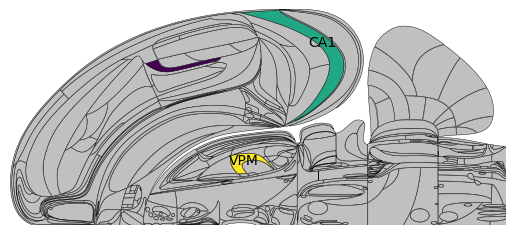

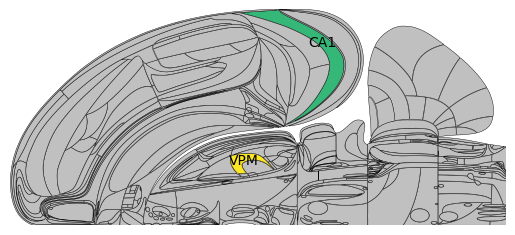

In [29]:
# 'VISa', 'CA1', 'VPM' are in Swanson and all 3 are plotted
acronyms = ['VISa', 'CA1', 'VPM']
values = np.array([1.5, 3, 4])
plot_swanson_vector(acronyms, values, annotate=True,
                    annotate_list=['VISa', 'CA1', 'VPM'],empty_color='silver')

# 'VISa1','VISa2/3' are not in Swanson, only 'CA1', 'VPM' are plotted
acronyms = ['VISa1','VISa2/3', 'CA1', 'VPM']
values = np.array([1, 2, 3, 4])
plot_swanson_vector(acronyms, values, annotate=True,
                    annotate_list=['VISa1','VISa2/3', 'CA1', 'VPM'],empty_color='silver')

You can plot onto parents of a region, for example you can plot over `PTLp` (which is the parent of `VISa` and `VISrl`).

/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:439: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:441: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))
/Applications/anaconda3/envs/iblenv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:439: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:441: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))
/Applications/anaconda3/en

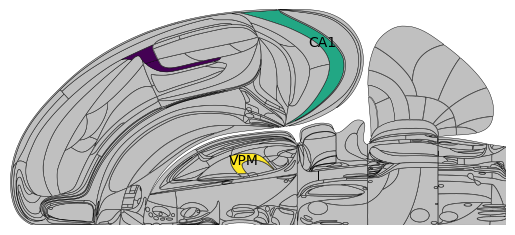

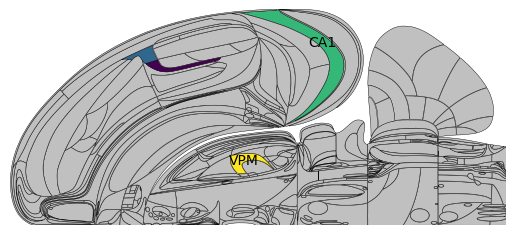

In [32]:
# Plotting over a parent region paints the same value across all children
acronyms = ['PTLp', 'CA1', 'VPM']
values = np.array([1.5, 3, 4])
plot_swanson_vector(acronyms, values, annotate=True,
                    annotate_list=['PTLp', 'CA1', 'VPM'],empty_color='silver')

# Plotting over a parent, and child region will overwrite the corresponding portion of the parent region
acronyms = ['PTLp','VISrl', 'CA1', 'VPM']
values = np.array([1, 2, 3, 4])
plot_swanson_vector(acronyms, values, annotate=True,
                    annotate_list=['PTLp','VISrl', 'CA1', 'VPM'],empty_color='silver')

## Mapping to the swanson brain regions

Similarly as explained in this [page](https://int-brain-lab.github.io/iblenv/notebooks_external/atlas_mapping.html), you can map brain regions to those found in Swanson using `br.acronym2acronym`:

In [15]:
br.acronym2acronym('MDm', mapping='Swanson')

array(['MD'], dtype=object)

## Plotting values on the swanson flatmap

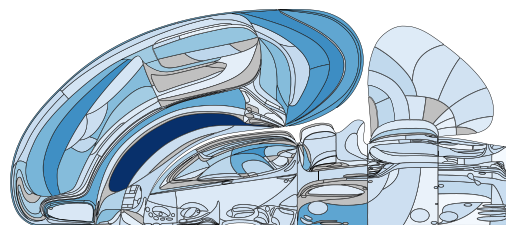

In [16]:
# prepare array of acronyms
acronyms = np.array(
    ['VPLpc', 'PO', 'LP', 'DG', 'CA1', 'PTLp', 'MRN', 'APN', 'POL',
       'VISam', 'MY', 'PGRNl', 'IRN', 'PARN', 'SPVI', 'NTS', 'SPIV',
       'NOD', 'IP', 'AON', 'ORBl', 'AId', 'MOs', 'GRN', 'P', 'CENT',
       'CUL', 'COApm', 'PA', 'CA2', 'CA3', 'HY', 'ZI', 'MGv', 'LGd',
       'LHA', 'SF', 'TRS', 'PVT', 'LSc', 'ACAv', 'ACAd', 'MDRNv', 'MDRNd',
       'COPY', 'PRM', 'DCO', 'DN', 'SIM', 'MEA', 'SI', 'RT', 'MOp', 'PCG',
       'ICd', 'CS', 'PAG', 'SCdg', 'SCiw', 'VCO', 'ANcr1', 'ENTm', 'ENTl',
       'NOT', 'VPM', 'VAL', 'VPL', 'CP', 'SSp-ul', 'MV', 'VISl', 'LGv',
       'SSp-bfd', 'ANcr2', 'DEC', 'LD', 'SSp-ll', 'V', 'SUT', 'PB', 'CUN',
       'ICc', 'PAA', 'EPv', 'BLAa', 'CEAl', 'GPe', 'PPN', 'SCig', 'SCop',
       'SCsg', 'RSPd', 'RSPagl', 'VISp', 'HPF', 'MGm', 'SGN', 'TTd', 'DP',
       'ILA', 'PL', 'RSPv', 'SSp-n', 'ORBm', 'ORBvl', 'PRNc', 'ACB',
       'SPFp', 'VM', 'SUV', 'OT', 'MA', 'BST', 'LSv', 'LSr', 'UVU',
       'SSp-m', 'LA', 'CM', 'MD', 'SMT', 'PFL', 'MARN', 'PRE', 'POST',
       'PRNr', 'SSp-tr', 'PIR', 'CTXsp', 'RN', 'PSV', 'SUB', 'LDT', 'PAR',
       'SPVO', 'TR', 'VISpm', 'MS', 'COApl', 'BMAp', 'AMd', 'ICe', 'TEa',
       'MOB', 'SNr', 'GU', 'VISC', 'SSs', 'AIp', 'NPC', 'BLAp', 'SPVC',
       'PYR', 'AV', 'EPd', 'NLL', 'AIv', 'CLA', 'AAA', 'AUDv', 'TRN'],
      dtype='<U8')
values = np.array([ 7.76948616, 25.51506047, 21.31094194, 23.11353701, 26.18071135,
       16.42116195, 22.4522099 , 20.04564731,  9.98702368, 11.00518771,
       11.23163309,  3.90841049, 11.44982496,  7.49984019, 10.59146742,
        7.68845853, 10.38817938,  6.53187499, 14.22331705, 19.26731921,
       14.6739601 , 10.37711987, 19.87087356, 12.56497513, 11.03204901,
       12.85149192, 10.39367399,  5.26234078,  7.36780286,  7.77672633,
       22.30843636,  9.63356153, 11.33369508,  7.70210975, 14.56984632,
        7.95488849,  9.85956065, 10.40381726,  6.31529234,  7.82651245,
       11.3339313 , 12.26268021,  8.67874273,  8.07579753, 10.14307203,
       10.08081832,  7.88595354,  7.49586605, 12.6491355 ,  7.92629876,
       12.52110187, 14.27405322, 25.95808524,  6.52603939,  3.15160563,
       11.60061018, 11.1043498 ,  8.0733422 , 11.71522066,  4.62765218,
        7.49833868, 18.78977643, 17.00685931,  6.3841865 , 21.0516987 ,
       13.16635271, 13.32514284, 39.00407907, 10.17439742, 10.71338756,
       12.98324876,  9.36698057, 18.72583288,  8.86341551,  8.59402471,
       14.40309408, 11.2151223 ,  8.54318159,  7.27041139,  7.54384726,
        7.12004486,  8.61247715,  6.24836557,  7.61490273,  7.97743213,
        5.90638179, 11.18067752,  9.60402511, 10.27972062,  4.88568098,
        5.15238733,  9.48240265,  5.5200633 , 17.34425384, 20.51738915,
        8.67575586, 10.13415575, 12.55792577, 11.28995505, 12.01846393,
       16.44519718, 11.55540348, 12.6760064 , 14.59124425, 16.08650743,
        5.49252396, 14.21853759,  9.80928243, 11.1998899 ,  8.53843453,
        8.95692822,  7.44622149,  9.41208445, 10.00368097, 18.36862111,
        5.90905433, 18.73273459, 10.41462726, 10.38639344, 13.71164211,
        8.1023596 ,  7.57087137,  3.95315742, 12.24423806, 10.4316517 ,
       10.75912468,  9.21246988, 21.71756051,  8.55320981, 10.69256597,
        8.20796144, 24.13594074,  4.55095547, 12.43055174,  7.00374928,
        4.72499044,  6.22081559,  6.50700078,  6.73499461, 12.77964412,
        8.8475468 , 11.20443401,  6.59475644,  8.59815892,  7.16696761,
       10.62813483,  7.77992602, 16.02889234,  9.21649532,  7.08618021,
        5.56980282,  3.61976479,  6.86178595, 13.44050831, 11.9525432 ,
        7.21974504,  6.28513041,  6.8381433 ,  5.93095918,  8.12844537,
        8.62486916])


# and display on a single hemishphere, using a blue colormap
plot_swanson_vector(acronyms, values, cmap='Blues', br=br)

### Lateralized display
A more advanced example is when each hemisphere is assigned a different value.

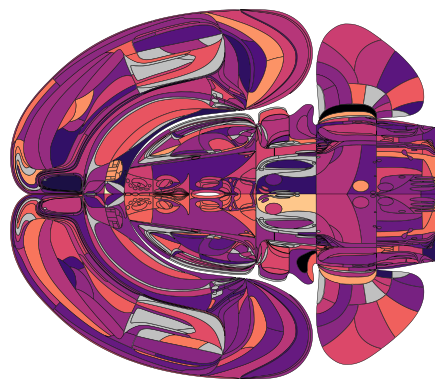

In [17]:
# In our atlas convention, differentiating between hemishperes is done using negative indices
regions_rl = np.r_[br.acronym2id(acronyms), -br.acronym2id(acronyms)]
# assign random values for the sake of this example
values_rl = np.random.randn(regions_rl.size)
# display with an explicit dual hemisphere setup
plot_swanson_vector(regions_rl, values_rl, hemisphere='both', cmap='magma', br=br)

## Portrait orientation
One can also mirror the hemishperes and orient the display in portrait mode.

/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:439: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/gaelle/Documents/Git/int-brain-lab/ibllib-repo/ibllib/atlas/regions.py:441: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))
/Applications/anaconda3/envs/iblenv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


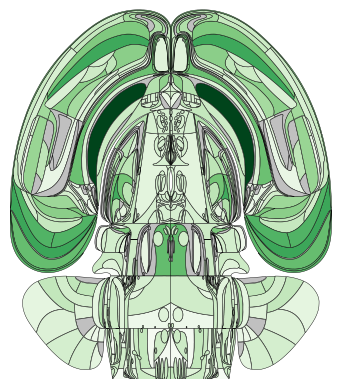

In [18]:
plot_swanson_vector(acronyms=acronyms, values=values, orientation='portrait', cmap='Greens', hemisphere='mirror')